# Bibliotecas e Pré Processamento

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import warnings

warnings.filterwarnings('ignore')

In [2]:
# carregando dataset
data = load_breast_cancer()

#divisão das variáveis
y = data.target
X = data.data

# treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   train_size = 0.8, random_state = 42, stratify=y)

# Modelo e parâmetros

In [3]:
mlp = MLPClassifier(max_iter=100) # Criação da instância do MLPClassifier com 100 épocas 
mlp.fit(X_train, y_train) # backpropagation

MLPClassifier(max_iter=100)

In [5]:
#definição dos hiperparâmetros

parameter_space = {
'hidden_layer_sizes': [(10,30,10),(20,)] , # estrutura com três camadas ocultas, com 10, 30 e 10 neurônios e uma única camada oculta com 20 neurônios
'activation': ['tanh', 'relu'], # funções de ativação utilizada nos neurônios das camadas ocultas (função binária e função não-linear )
'solver': ['sgd', 'adam'], # algoritmos de otimização usado para ajustar os pesos durante o treinamento
'alpha': [0.0001, 0.05], # 2 taxas para o parâmetro de regularização
'learning_rate': ['constant','adaptive'], #  taxas de aprendizado utilizadas durante o treinamento (constante ou adaptada com base na convergência do treinamento)
}

In [6]:
# pconfiguracoes da pesquisa em rede
clf = GridSearchCV(mlp, parameter_space, n_jobs= 1, cv=5) # modelo e parâmetros definidos anteriormente, 1 nucleo de CPU e 5 folds para validação cruzada 
clf.fit(X_train, y_train) #avaliação dos parâmetros com base nos dados de treino

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

# Resultados

In [10]:
print('Melhores parâmetros encontrados:\n', clf.best_params_)

Melhores parâmetros encontrados:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [7]:
y_true, y_pred = y_test , clf.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        42
           1       0.93      0.97      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



# Lista de Scores

In [8]:
acuracias = clf.cv_results_['mean_test_score']

print('Lista de acurácia para cada combinação:')
for posicao, (acuracia, params) in enumerate(zip(acuracias, clf.cv_results_['params']), start=1):
    print("Posição: %d, Acurácia: %0.2f para %r" % (posicao, acuracia, params))

Lista de acurácia para cada combinação:
Posição: 1, Acurácia: 0.67 para {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
Posição: 2, Acurácia: 0.79 para {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}
Posição: 3, Acurácia: 0.73 para {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}
Posição: 4, Acurácia: 0.90 para {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
Posição: 5, Acurácia: 0.79 para {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'sgd'}
Posição: 6, Acurácia: 0.84 para {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}
Posição: 7, Acurácia: 0.83 para {'activation': 

# Gráfico de Scores

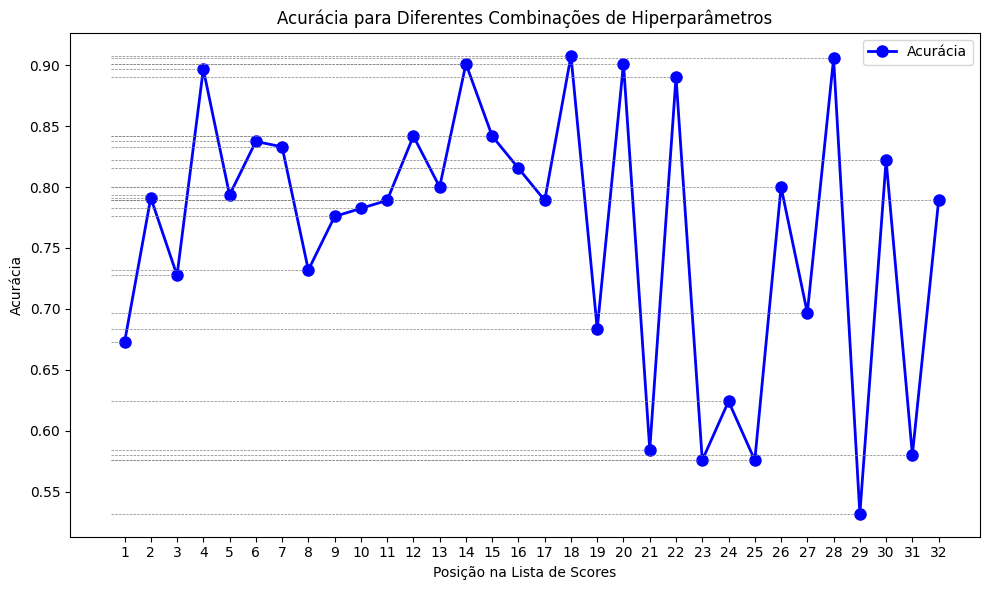

In [9]:
acuracias = clf.cv_results_['mean_test_score']
posicoes = list(range(1, len(acuracias) + 1))

# gráfico com uma linha de conexão 
plt.figure(figsize=(10, 6))
plt.plot(posicoes, acuracias, marker='o', color='b', linewidth=2, markersize=8, label='Acurácia')
plt.xlabel('Posição na Lista de Scores')
plt.ylabel('Acurácia')
plt.title('Acurácia para Diferentes Combinações de Hiperparâmetros')

# pontos de dados como marcadores
plt.scatter(posicoes, acuracias, color='b', zorder=5)

# linha horizontal para destacar os valores de acurácia
for i, acuracia in zip(posicoes, acuracias):
    plt.hlines(y=acuracia, xmin=0.5, xmax=i, color='gray', linestyle='--', linewidth=0.5)

plt.xticks(posicoes, posicoes)
plt.tight_layout()
plt.legend()
plt.show()